<a href="https://colab.research.google.com/github/leehanchung/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Algebra Sprint Challenge

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

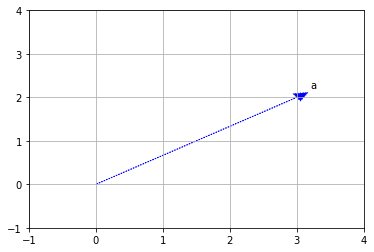

In [0]:
a = np.array([3, 2])

fig = plt.figure()
ax = fig.gca()
ax.set_xlim(-1, 4)
ax.set_ylim(-1, 4)
ax.arrow(0, 0, a[0], a[1], head_width=0.2, head_length=0.2, color = 'b', ls=":")
ax.text(a[0]+0.2, a[1]+0.2, "a")
ax.grid()
plt.show();

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [0]:
b = np.array([17, -4, -2, 1])
np.linalg.norm(b)

17.60681686165901

### Norm of a vector represents its magnitude.

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [0]:
c = np.array([3, 7, -2, 12])
d = np.array([9, -7, 4, 6])
c.dot(d)

42

### No they are not orthogonal because the dot product is not zero.  Orthogonal vectors have dot product of zero.

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [0]:
E = np.array([7, 4, 2, 1, 3, -1, 2, 6, -4]).reshape(3, 3)

print("E inversed is \n{},\n\n and E Transposed is \n {}".format(np.linalg.inv(E), E.T))

E inversed is 
[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]],

 and E Transposed is 
 [[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [0]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [0]:
print("customers: mean {:.2f}, variance {:.2f}, standard deviation {:.2f}".format(df.customers.mean(), df.customers.var(), df.customers.std()))
print("snow:      mean {:.2f},    variance {:.2f},     standard deviation {:.2f}".format(df.snow.mean(), df.snow.var(), df.snow.std()))

customers: mean 1135.71, variance 98761.90, standard deviation 314.26
snow:      mean 2.71,    variance 8.57,     standard deviation 2.93


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [0]:
### No, they are not comparable since they have different magnitudes. We would have to standardize them to mean 0 and std of 1 for a better comparison

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [0]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [0]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [0]:
df_num = df.select_dtypes(include=[np.number])
df_num = (df_num - df_num.mean())/df_num.std()
df[df_num.columns] = df_num
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,0.570083,-0.015152,-0.224774,0.558227,-0.547700,0.113060,-0.389777,0.747650,0.327129,-0.291214,0.697564,0.638613,-0.557999,-0.044962,-0.376921,0.090931,-0.119774
1,Wales,0.464021,-1.106061,1.038240,0.998043,1.330128,1.340571,0.377324,0.947023,1.213892,0.072804,1.014638,0.804795,1.454458,1.393816,-1.216104,0.729040,0.838419
2,Scotland,0.464021,-0.196970,0.470954,-0.287572,-0.950091,-0.468392,-1.156878,-0.614734,-0.429864,1.310463,-0.760979,-0.049855,-0.740950,-0.404656,1.031200,0.620562,0.646780
3,North Ireland,-1.498124,1.318182,-1.284421,-1.268698,0.167663,-0.985239,1.169331,-1.079939,-1.111157,-1.092053,-0.951223,-1.393554,-0.155508,-0.944198,0.561826,-1.440533,-1.365425


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [0]:
pca = PCA(n_components=2)
pca.fit(df_num)
print(pca.explained_variance_ratio_.sum())
df_pca = pca.fit_transform(df_num)

0.9319915970724626


### The first two principal components sums up to 93.2%.  Not bad not bad.

In [0]:
df_pca

array([[-0.82661245,  0.28433201],
       [-3.91525836, -1.50288288],
       [ 0.42260165,  2.80044205],
       [ 4.31926916, -1.58189118]])

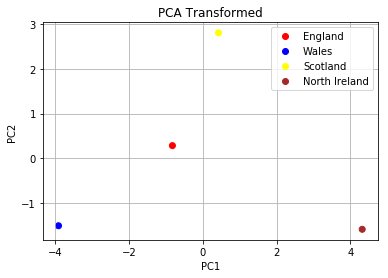

In [0]:
fig = plt.figure()
ax = fig.gca()
colors = {'England':'red', 'Wales':'blue', 'Scotland':'yellow', 'North Ireland':'brown'}
ax.scatter(df_pca[:,0], df_pca[:,1], c = df.Country.apply(lambda x: colors[x]))
ax.grid()
plt.title('PCA Transformed')
plt.xlabel('PC1')
plt.ylabel('PC2')
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colors.values()]
plt.legend(markers, colors.keys(), numpoints=1)
plt.show()

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [0]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


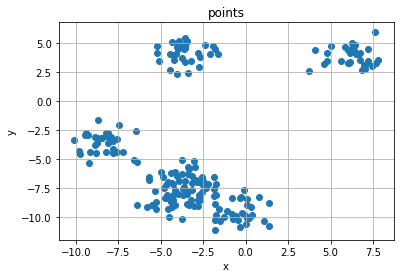

In [0]:
fig = plt.figure()
ax = fig.gca()
ax.scatter(points.x, points.y)
ax.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('points')
plt.show();

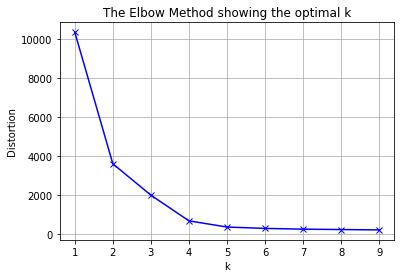

In [0]:
distortions = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k).fit(points)
    distortions.append(kmeans.inertia_)
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.grid()
plt.show()

In [0]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(points)
k = kmeans.predict(points)

In [0]:
# making a new df with the k means cluster labels
points_k = pd.DataFrame({'x': points.x, 'y':points.y, 'k': k})

In [0]:
points_k.head()

,x,y,k
0,-7.846803,-3.421277,3
1,-3.554323,-6.884729,1
2,-0.192822,-9.671030,1
3,-6.401456,-5.223972,3
4,-0.804026,-9.704457,1


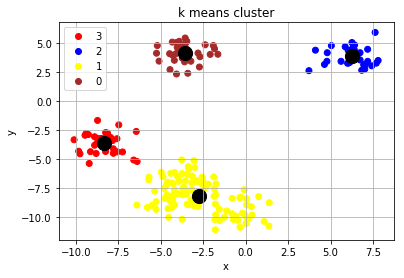

In [0]:
fig = plt.figure()
ax = fig.gca()
colors = {3:'red', 2:'blue', 1:'yellow', 0:'brown'}
ax.scatter(points_k.x, points_k.y, c = points_k.k.apply(lambda x: colors[x]))
ax.grid()
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colors.values()]
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=1);
plt.legend(markers, colors.keys(), numpoints=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('k means cluster')
plt.show()